# Plotting in Julia

As so often in open source, there is not just one package but many.

Probably the most prolific are:
- [Plots.jl](https://github.com/JuliaPlots/Plots.jl) which itself wraps many underlying plotting packages.
- [PythonPlot.jl](https://github.com/stevengj/PythonPlot.jl) interface to the well known `matplotlib` Python plotting package
  (formerly `PyPlot.jl`)
- [Gadfly.jl](https://github.com/GiovineItalia/Gadfly.jl) a grammar of graphics based plotting (similar to R, I think)
- [Makie.jl](https://github.com/MakieOrg/Makie.jl) a pure Julia, high-performance plotting package.  Cool, but slow to load.
- many more: UnicodePlots.jl, PlotlyJS.jl, PGFPlotsX.jl, GMT.jl, Gnuplot.jl, VegaLite.jl, etc.

**I will show-case Plots.jl**

Follows [https://docs.juliaplots.org/latest/tutorial/](https://docs.juliaplots.org/latest/tutorial/)

# Plots.jl

Pros:
- probably most widely used plotting package
- many packages provide out-of-the box functionality with Plots.jl
- can use different backends

Cons:
- medium-slow to load
- fine-scale tweaks can be hard to do or find out how to do

Alternatively, I sometimes use `PythonPlot.jl`

# Install Plots.jl

Install Plots:

In [1]:
using Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/julia/workshops/WSL-2023-with-victor/WSLJuliaWorkshop2023/Day1/33_plotting/Project.toml`
  No Changes to `~/julia/workshops/WSL-2023-with-victor/WSLJuliaWorkshop2023/Day1/33_plotting/Manifest.toml`


the GR.jl backend comes automatically installed

Install [backends](https://docs.juliaplots.org/latest/backends/) if needed/wanted:

In [2]:
# this may install a whole Conda-Python install, depending on whether
# it can find python and matplotlib or not
Pkg.add("PythonPlot")

# Basic usage

Plot a line plot

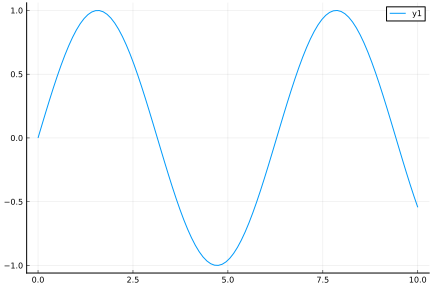

In [12]:
using Plots
x = range(0, 10, length=100)
y = sin.(x)
plot(x, y)

# Basic usage

Plot another line plot, note the **!**

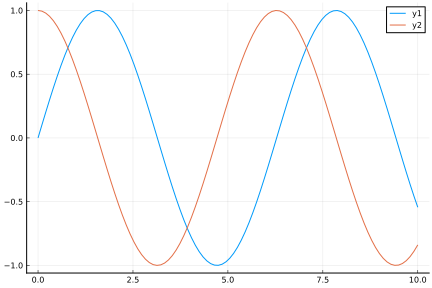

In [13]:
y = cos.(x)
plot!(x, y)

# Basic usage

Save it as a file

In [14]:
savefig("test.png")

"/home/mauro/julia/workshops/WSL-2023-with-victor/WSLJuliaWorkshop2023/Day1/33_plotting/test.png"

# Refining plots: attributes

All attributes are listed [here](https://docs.juliaplots.org/latest/attributes/#attributes)

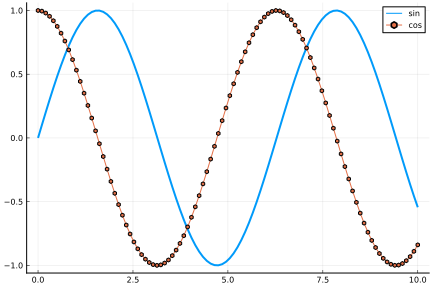

In [15]:
x = range(0, 10, length=100)
y = sin.(x)

plot(x, y, label="sin", linewidth=2)
c = cos.(x)
plot!(x, c, label="cos", marker = :hexagon)

# Refining plots: type of plots

scatter, heatmap, etc

See [gallery](https://docs.juliaplots.org/latest/gallery/pythonplot/)

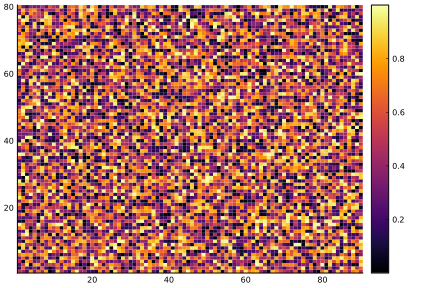

In [16]:
heatmap(rand(80,90))

# Subplots

[https://docs.juliaplots.org/latest/layouts/](https://docs.juliaplots.org/latest/layouts/)

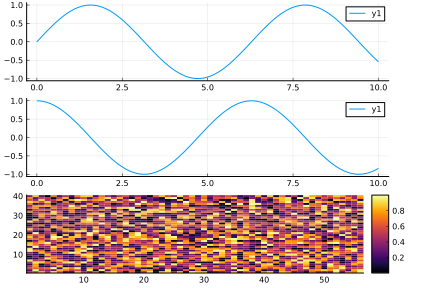

In [17]:
plot(plot(x, sin.(x)),
     plot(x, cos.(x)),
     heatmap(rand(40,56)),
     layout=(3,1)
     )

# Subplots

[https://docs.juliaplots.org/latest/layouts/](https://docs.juliaplots.org/latest/layouts/)

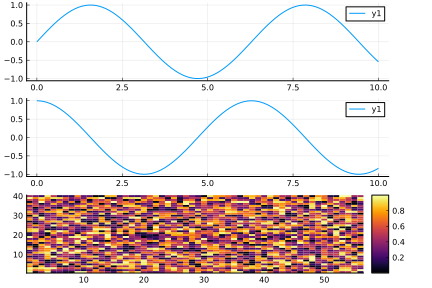

In [18]:
p1 = plot(x, sin.(x))
p2 = plot(x, cos.(x))
p3 = heatmap(rand(40,56))
plot(p1, p2, p3, layout=(3,1) )

# Plots.jl recipes

Many Julia packages provide so-called recipes to plot using Plots.jl

Example with [Measurements.jl](https://juliaphysics.github.io/Measurements.jl/stable/examples/#Integration-with-Plots.jl) plotting error-bars automatically

   Resolving package versions...
  No Changes to `~/julia/workshops/WSL-2023-with-victor/WSLJuliaWorkshop2023/Day1/33_plotting/Project.toml`
  No Changes to `~/julia/workshops/WSL-2023-with-victor/WSLJuliaWorkshop2023/Day1/33_plotting/Manifest.toml`


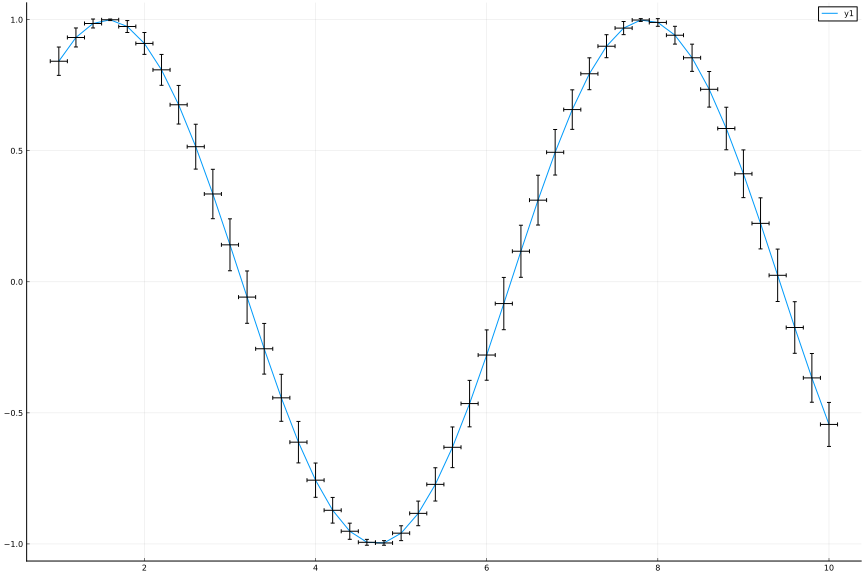

In [19]:
Pkg.add("Measurements")
using Measurements
x = [x ± 0.1 for x in 1:0.2:10] # these numbers now have an uncertainty of +/- 0.1
plot(x, sin.(x), size = (1200, 800))

# Plots.jl backends

Plots.jl is a wrapper around other plotting libraries, so-called backends.
Different backends have different abilities, say zoom-able vs not.

Default is GR.jl (fast but not interactive)

   Resolving package versions...
  No Changes to `~/julia/workshops/WSL-2023-with-victor/WSLJuliaWorkshop2023/Day1/33_plotting/Project.toml`
  No Changes to `~/julia/workshops/WSL-2023-with-victor/WSLJuliaWorkshop2023/Day1/33_plotting/Manifest.toml`


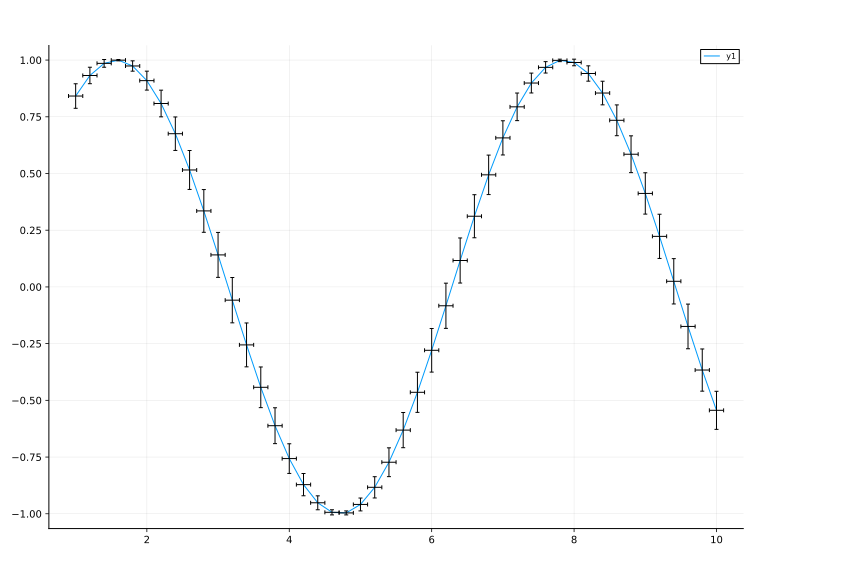

In [20]:
Pkg.add("PythonPlot")
pythonplot()
# re-plot previous plot
plot(x, sin.(x), size = (1200, 800),
     ticks=:native) # this can be useful, as only then ticks get re-rendered on zoom